# 1. split data into smaller chunks

In [3]:
# use the logic same as Minglei's implementation, truncate for every 200 timesteps
import os
DATA_DIR = 'data/'
ORIGINAL_TRAIN_DATA = 'train.csv'
CHUNK_SIZE = 200
reader = open(os.path.join(DATA_DIR, ORIGINAL_TRAIN_DATA))
writer_dict = dict()

header = None
for i, line in enumerate(reader):
    if i == 0:
        header = line
        continue
    time_id = line.split(',')[1]

    writer_id = int(time_id) // CHUNK_SIZE
    if writer_id not in writer_dict:
        writer_dict[writer_id] = open(os.path.join(DATA_DIR, f'train-{writer_id}.csv'), 'w')
        writer_dict[writer_id].write(header)
    writer_dict[writer_id].write(line)

for _, writer in writer_dict.items():
    writer.close()

# 1. Explore data structure and basic dimensions

## 1.1 basic info

In [4]:
# line numbers in each file
!wc -l ./data/train-*.csv

     450954 ./data/train-0.csv
     401980 ./data/train-1.csv
     446670 ./data/train-2.csv
     532231 ./data/train-3.csv
     601442 ./data/train-4.csv
     639614 ./data/train-5.csv
      68526 ./data/train-6.csv
    3141417 total


In [8]:
import pandas as pd
import os

DATA_DIR = './data'

train_0 = pd.read_csv(os.path.join(DATA_DIR, 'train-0.csv'))
train_0.head(10)

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624
5,0_9,0,9,1.505904,0.608855,1.369305,-0.761515,0.865860,-0.359269,-1.835762,...,0.333684,-1.095620,-0.335999,0.819155,-1.060166,-0.343812,-1.087009,0.077862,0.142943,-0.055550
6,0_10,0,10,-0.260731,-1.863797,0.113691,1.573864,-0.598433,-0.569936,0.398784,...,0.821560,0.912726,0.476309,-1.220772,0.941183,-0.434315,1.296864,0.171329,1.051288,-0.745335
7,0_12,0,12,-0.469207,0.408954,-0.765238,0.261430,-0.591895,-0.037260,0.668721,...,0.821560,-1.095620,-0.864354,-1.220772,-1.060166,-0.300218,1.296864,-0.779556,0.274961,-0.182520
8,0_13,0,13,0.094525,0.861187,2.373796,-1.148977,0.752205,-0.050502,-2.249047,...,-0.658241,0.912726,0.718282,0.819155,0.941183,4.198117,1.296864,1.854434,0.000000,-0.688340
9,0_14,0,14,-0.251120,-2.476555,0.239253,2.222353,-0.582276,-0.618236,0.386263,...,0.821560,-1.095620,-0.615709,-1.220772,-1.060166,-0.647769,0.104928,-0.849789,0.805876,-0.820165


In [9]:
print(f"size of train 0th chunk: {train_0.size}")
print(f"time step ranging: {train_0['time_id'].min()} to {train_0['time_id'].max()}, with uniq values {len(pd.unique(train_0['time_id']))}")
print(f"investment asset types: {train_0['investment_id'].min()} to {train_0['investment_id'].max()}, with uniq values {len(pd.unique(train_0['investment_id']))}")

size of train 0th chunk: 137089712
time step ranging: 0 to 199, with uniq values 200
investment asset types: 1 to 3772, with uniq values 2534


Summary:
1. large number of assets (3772)
2. Not all assets appear in each time step

## 1.2 more about missing data

In [18]:
# NA data, INF data
import numpy as np
na_sum = train_0.isna().sum()
inf_sum = np.isinf(train_0.drop('row_id', axis=1)).sum()
print(f"columns with NA {na_sum[na_sum > 0]}")
print(f"columns with INF {inf_sum[inf_sum > 0]}")

columns with NA Series([], dtype: int64)
columns with INF Series([], dtype: int64)


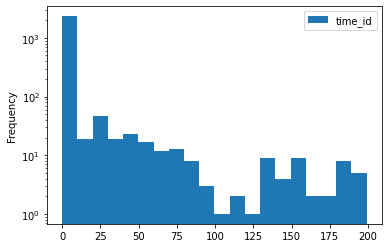

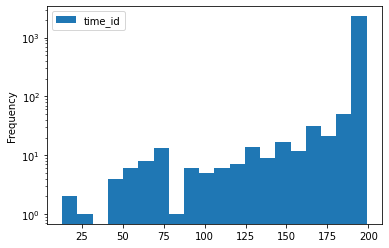

In [56]:
# time range of each asset
# 1. distribution of starting timeframe and ending timeframe
min_time_id_dist = train_0.groupby(['investment_id'])['time_id'].min().to_frame()
graph_min = min_time_id_dist.plot.hist(bins=20, logy=True)

max_time_id_dist = train_0.groupby(['investment_id'])['time_id'].max().to_frame()
graph_max = max_time_id_dist.plot.hist(bins=20, logy=True)

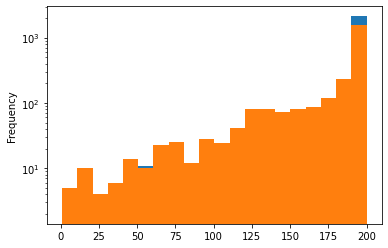

In [81]:
# expanding time frames of each asset
asset_range = train_0.groupby(['investment_id'])['time_id'].max() - train_0.groupby(['investment_id'])['time_id'].min() + 1
graph_range = asset_range.plot.hist(bins=20, logy=True)

# data points of each asset
asset_count = train_0.groupby(['investment_id']).size()
graph_count = asset_count.plot.hist(bins=20, logy=True)


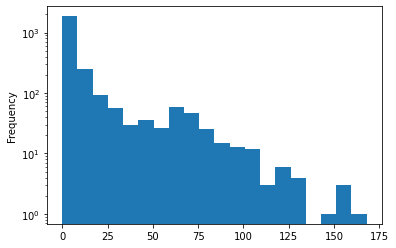

In [82]:
# assets with gaps within its' range
gap_times = asset_range - asset_count
graph_gaps = gap_times.plot.hist(bins=20, logy=True)

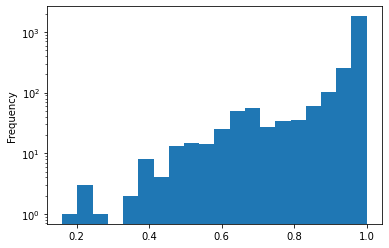

In [83]:
# the ratio of existing data in assets
gap_ratio = asset_count / asset_range
graph_gap_ratio = gap_ratio.plot.hist(bins=20, logy=True)

In [11]:
## 1.3 correlation between assets

In [93]:
# Given that some assets have huge missing data, here we only do analysis on assets with sufficient information
RATIO_THRESHOLD = 0.85
ABSOLUTE_COUNT_THRESHOLD = 175

asset_count_df = asset_count.to_frame('dp_count')
gap_ratio_df = gap_ratio.to_frame('dp_ratio')
merged_table = pd.merge(gap_ratio_df, asset_count_df, on=['investment_id'], how='outer')
assert merged_table.isna().sum().sum() == 0

In [94]:
merged_data = pd.merge(merged_table, train_0, on=['investment_id'], how='outer')
assert merged_data.isna().sum().sum() == 0

In [96]:
sufficient_info_data = merged_data[(merged_data['dp_count'] > ABSOLUTE_COUNT_THRESHOLD) & (merged_data['dp_ratio'] > RATIO_THRESHOLD)]

In [99]:
# stats in left data
uniq_asset_ids = pd.unique(sufficient_info_data['investment_id'])
uniq_asset_count = len(uniq_asset_ids)
print(f'existing {uniq_asset_count} types of assets')

existing 1871 types of assets


In [114]:
# Fill up the gap for all existing assets
id2data = dict()
MIN_TIME = 0
MAX_TIME = 199
for asset_id in uniq_asset_ids:
    id2data[asset_id] = sufficient_info_data[sufficient_info_data['investment_id'] == asset_id]\
        .drop(['investment_id', 'dp_ratio', 'dp_count', 'row_id'], axis=1)\
        .set_index('time_id')\
        .reindex(range(MIN_TIME, MAX_TIME), method='nearest')


In [122]:
all_asset_data = pd.concat([asset_data['target'].to_frame(name=f'target_{asset_id}') for asset_id, asset_data in id2data.items()], axis=1)

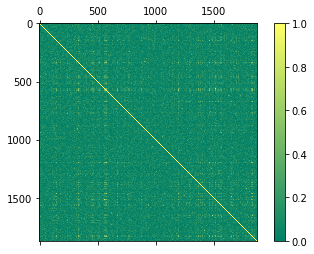

In [130]:
import matplotlib.pyplot as plt
corr = all_asset_data.corr().abs()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='summer', vmin=0, vmax=1)
fig.colorbar(cax)
plt.show()

In [12]:
## 1.4 correlation between features

In [ ]:
## 1.5 what are the most important features